In [1]:
import numpy as np
import anndata
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from dredFISH.Utils import basicu

# pv vipr2 (or Sst chodl)

In [2]:
f = '/bigstore/GeneralStorage/fangming/projects/dredfish/data/rna/scrna_ss_ctxhippo_a_exon_count_matrix_v5.h5ad'
adata = anndata.read(f)
adata

AnnData object with n_obs × n_vars = 73347 × 45768
    obs: 'donor_sex_id', 'donor_sex_label', 'donor_sex_color', 'region_id', 'region_label', 'region_color', 'platform_label', 'cluster_order', 'cluster_label', 'cluster_color', 'subclass_order', 'subclass_label', 'subclass_color', 'neighborhood_id', 'neighborhood_label', 'neighborhood_color', 'class_order', 'class_label', 'class_color', 'exp_component_name', 'external_donor_name_label', 'full_genotype_label', 'facs_population_plan_label', 'injection_roi_label', 'injection_materials_label', 'injection_method_label', 'injection_type_label', 'full_genotype_id', 'full_genotype_color', 'external_donor_name_id', 'external_donor_name_color', 'facs_population_plan_id', 'facs_population_plan_color', 'injection_materials_id', 'injection_materials_color', 'injection_method_id', 'injection_method_color', 'injection_roi_id', 'injection_roi_color', 'injection_type_id', 'injection_type_color', 'cell_type_accession_label', 'cell_type_alias_label', 'ce

In [3]:
genes = adata.var.index.values
covall = np.asarray(adata.X.sum(axis=1)).reshape(-1,)

In [4]:
covgenes = np.asarray(adata.X.sum(axis=0)).reshape(-1,)
covgenes

array([2.255000e+04, 3.430000e+03, 8.878497e+06, ..., 0.000000e+00,
       0.000000e+00, 0.000000e+00], dtype=float32)

In [5]:
labels = adata.obs['cluster_label'].values
covtypes, types = basicu.group_sum(covall.reshape(-1,1), labels)
covtypes.shape, types.shape

((382, 1), (382,))

In [6]:
labels = adata.obs['subclass_label'].values
covtypes_l3, types_l3 = basicu.group_sum(covall.reshape(-1,1), labels)
covtypes_l3.shape, types_l3.shape

((42, 1), (42,))

In [7]:
cond2 = adata.obs['subclass_label']=='Pvalb'
adata2 = adata[cond2]
adata2

View of AnnData object with n_obs × n_vars = 4109 × 45768
    obs: 'donor_sex_id', 'donor_sex_label', 'donor_sex_color', 'region_id', 'region_label', 'region_color', 'platform_label', 'cluster_order', 'cluster_label', 'cluster_color', 'subclass_order', 'subclass_label', 'subclass_color', 'neighborhood_id', 'neighborhood_label', 'neighborhood_color', 'class_order', 'class_label', 'class_color', 'exp_component_name', 'external_donor_name_label', 'full_genotype_label', 'facs_population_plan_label', 'injection_roi_label', 'injection_materials_label', 'injection_method_label', 'injection_type_label', 'full_genotype_id', 'full_genotype_color', 'external_donor_name_id', 'external_donor_name_color', 'facs_population_plan_id', 'facs_population_plan_color', 'injection_materials_id', 'injection_materials_color', 'injection_method_id', 'injection_method_color', 'injection_roi_id', 'injection_roi_color', 'injection_type_id', 'injection_type_color', 'cell_type_accession_label', 'cell_type_alias_labe

In [8]:
def get_ftrs(mat, labels, cov=None):
    """
    """
    ctrds, types = basicu.group_sum(mat, labels)
    if cov is None:
        cov = np.sum(ctrds, axis=1)
    cpms = ctrds/cov.reshape(-1,1)*1e6
    ftrs = np.log10(cpms+1)
    return ftrs, types

In [9]:
mat = np.asarray(adata2.X.todense())
labels = adata2.obs['cluster_label'].values
ftrs, types = get_ftrs(mat, labels)
types

array(['108_Pvalb', '109_Pvalb', '110_Pvalb', '111_Pvalb', '112_Pvalb',
       '113_Pvalb', '114_Pvalb', '115_Pvalb', '116_Pvalb', '117_Pvalb',
       '118_Pvalb', '119_Pvalb', '120_Pvalb', '121_Pvalb',
       '122_Pvalb Vipr2', '123_Pvalb Vipr2'], dtype=object)

In [10]:
types2 = types
fg, bg = ftrs[-2:], ftrs[:-2]
fg.shape, bg.shape

((2, 45768), (14, 45768))

In [11]:
mfg = np.mean(fg, axis=0)
mbg = np.mean(bg, axis=0)
diff = mfg - mbg
diffmin = np.min(fg, axis=0) - np.max(bg, axis=0)

In [12]:
gsel = genes[np.logical_and(diff>np.log10(5), diffmin>0)] 
gsel, gsel.shape

(array(['1110032F04Rik', '2310067E19Rik', '9630028B13Rik', 'A730009L09Rik',
        'A830019P07Rik', 'Ackr3', 'Ak5', 'Angpt1', 'Anxa2', 'Apoc3',
        'Bmp4', 'C1ql1', 'Cacna2d1', 'Cacna2d3', 'Cacng3', 'Car4', 'Cd59a',
        'Cdh6', 'Chrna3', 'Chrna5', 'Chrnb4', 'Clrn1', 'Clstn2',
        'Cntnap5b', 'Crim1', 'Cryab', 'Dbhos', 'Dcxr', 'Ddr2', 'Dgkb',
        'Dpf3', 'E030019B13Rik', 'Egfl6', 'Elfn1', 'Elmo1', 'Epb4.1l4a',
        'Fgf13', 'Foxo1', 'Fras1', 'Frem1', 'Fstl5', 'Gadd45a', 'Gfra1',
        'Glul', 'Gm2061', 'Gm28523', 'Gm32661', 'Gm32813', 'Gm4980',
        'Gstm7', 'Hpca', 'Hs3st2', 'Hs3st4', 'Htra1', 'Id2', 'Ifi27',
        'Igfbp3', 'Il1r1', 'Inadl', 'Inpp4b', 'Isoc1', 'Itga6', 'Itgb8',
        'Itih5', 'Krt12', 'Krt20', 'LOC101056001', 'LOC102637409',
        'LOC105243688', 'Lamb1', 'Lamp5', 'Lhfpl3', 'Lrrc17', 'Mapk4',
        'Mctp2', 'Mcur1', 'Mei4', 'Mlip', 'Mro', 'Mxra7', 'Nfib', 'Nkx2-1',
        'Nrp1', 'Nyap2', 'Oprm1', 'Pcdh19', 'Pcdh8', 'Pde11a', 'Pde3a',

In [13]:
gselidx = basicu.get_index_from_array(genes, gsel)
ftrs_sel = ftrs[:,gselidx]

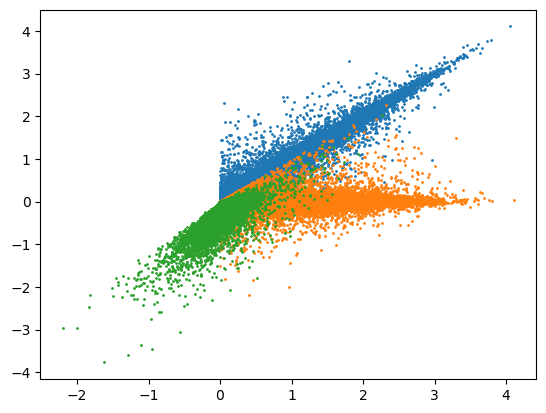

In [14]:
plt.scatter(mbg, mfg, s=1)
plt.scatter(mfg, diff, s=1)
plt.scatter(diff, diffmin, s=1,)

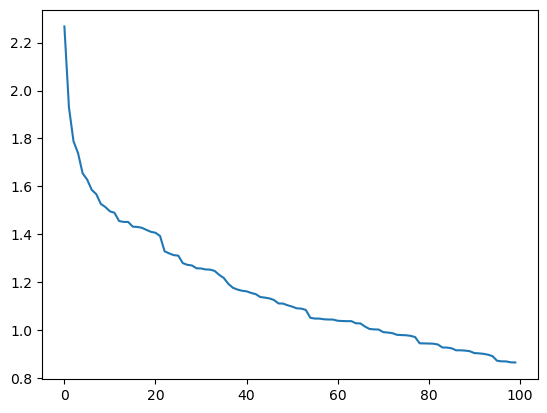

In [15]:
plt.plot(np.sort(diff)[::-1][:100])

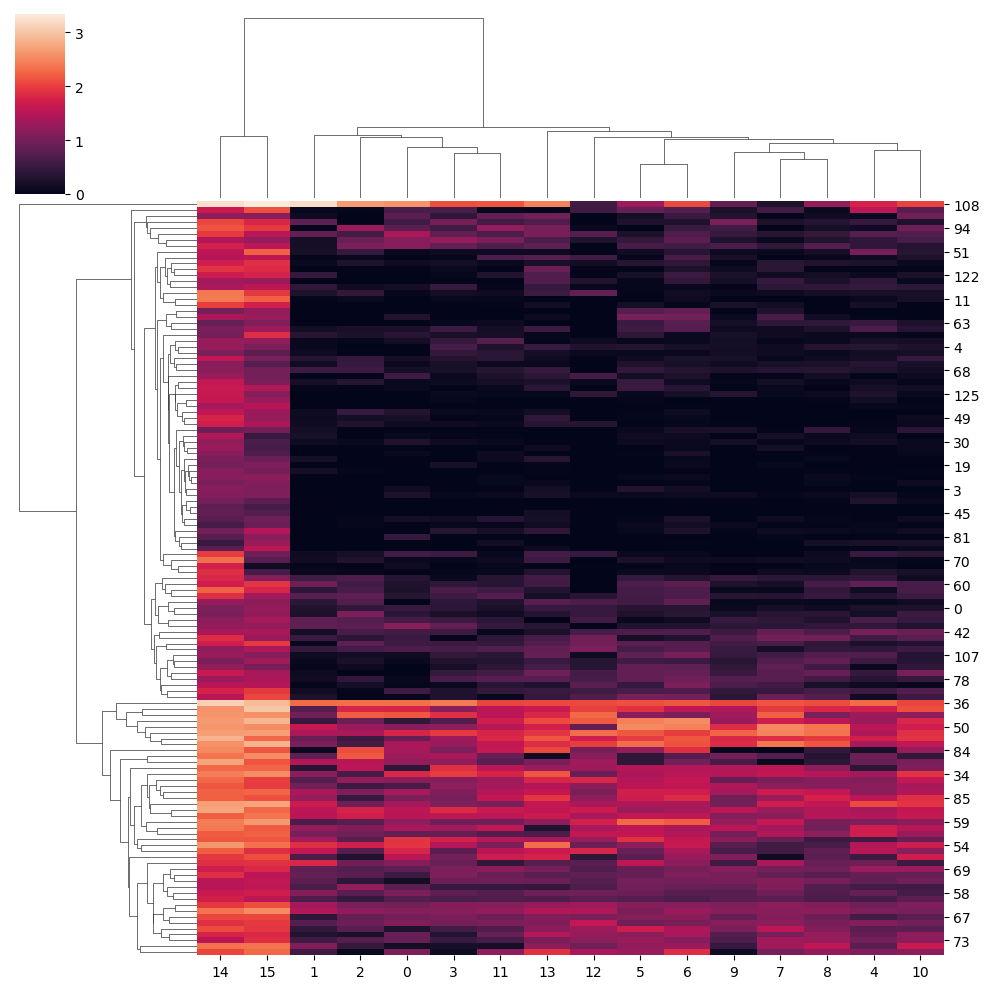

In [16]:
sns.clustermap(ftrs_sel.T)

In [23]:
# save
fout = "/bigstore/GeneralStorage/fangming/projects/dredfish/res_seq/Pvalb_Vipr2_subtype_genes.txt"
np.savetxt(fout, gsel, fmt='%s')

# check back
- not good

In [17]:
adata3 = adata[:,gsel]
adata3

View of AnnData object with n_obs × n_vars = 73347 × 127
    obs: 'donor_sex_id', 'donor_sex_label', 'donor_sex_color', 'region_id', 'region_label', 'region_color', 'platform_label', 'cluster_order', 'cluster_label', 'cluster_color', 'subclass_order', 'subclass_label', 'subclass_color', 'neighborhood_id', 'neighborhood_label', 'neighborhood_color', 'class_order', 'class_label', 'class_color', 'exp_component_name', 'external_donor_name_label', 'full_genotype_label', 'facs_population_plan_label', 'injection_roi_label', 'injection_materials_label', 'injection_method_label', 'injection_type_label', 'full_genotype_id', 'full_genotype_color', 'external_donor_name_id', 'external_donor_name_color', 'facs_population_plan_id', 'facs_population_plan_color', 'injection_materials_id', 'injection_materials_color', 'injection_method_id', 'injection_method_color', 'injection_roi_id', 'injection_roi_color', 'injection_type_id', 'injection_type_color', 'cell_type_accession_label', 'cell_type_alias_label

In [18]:
mat = np.asarray(adata3.X.todense())
labels = adata3.obs['cluster_label'].values
ftrs3, types3 = get_ftrs(mat, labels, cov=covtypes)

In [19]:
pvidx = basicu.get_index_from_array(types3, types2)
otheridx = [i for i in range(len(ftrs3)) if i not in pvidx]

<AxesSubplot:>

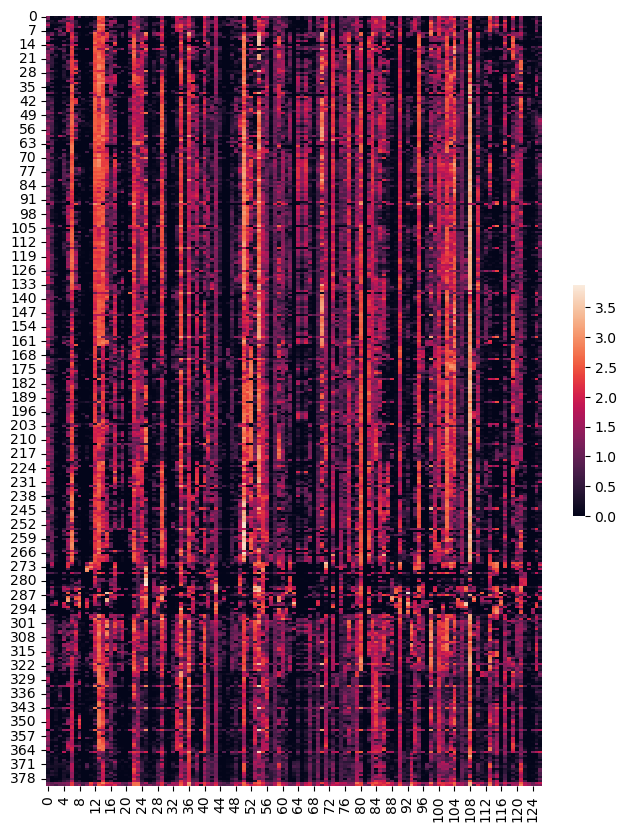

In [20]:
fig, ax = plt.subplots(figsize=(8,10))
sns.heatmap(ftrs3[np.hstack([otheridx, pvidx]),:], ax=ax, cbar_kws=dict(shrink=0.3))